In [455]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

In [456]:
data_df =  pd.read_csv('Amazon Headphone Review.csv')

# Data Analysis

In [457]:
data_df.shape

(33, 2)

In [458]:
data_df.columns

Index(['Reviews', 'Score'], dtype='object')

In [459]:
data_df.dtypes

Reviews    object
Score       int64
dtype: object

In [460]:
data_df['Score'].unique()

array([5, 4, 3, 1, 2])

In [461]:
data_df['Score'].value_counts()

Score
5    15
1     9
4     4
3     3
2     2
Name: count, dtype: int64

In [462]:
data_df.isnull().sum()

Reviews    0
Score      0
dtype: int64

In [463]:
data_df.head()

,Reviews,Score
0,"My second time buying this headset, first time...",5
1,I bought this headset for my PS5 and really li...,4
2,I am not impressed by the sound quality or the...,3
3,I bought these for my boyfriend for Christmas ...,1
4,Not 7.1 but better than some,5


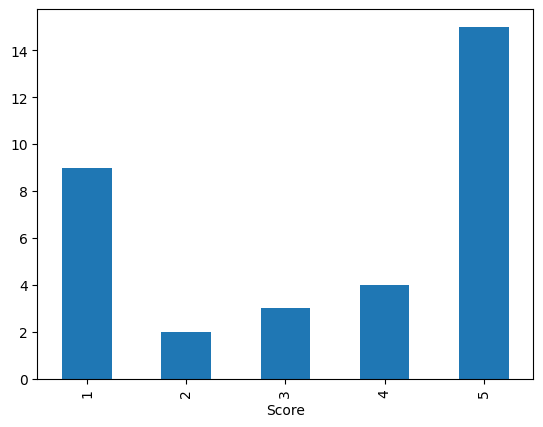

In [464]:
count = data_df['Score'].value_counts().sort_index().plot(kind='bar')
plt.show()

# Sentiment Score

In [465]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

In [466]:
sia = SentimentIntensityAnalyzer()

In [467]:
example_review = data_df['Reviews'][23]
example_review

'Right out of the box, the wired headset disconnects with any small movement of the wire. Waste of time and money.'

In [468]:
sia.polarity_scores('The worst headsets ever')

{'neg': 0.577, 'neu': 0.423, 'pos': 0.0, 'compound': -0.6249}

In [469]:
sia.polarity_scores('The best headsets ever')

{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}

In [470]:
sia.polarity_scores(example_review)

{'neg': 0.123, 'neu': 0.877, 'pos': 0.0, 'compound': -0.4215}

In [471]:
for index, row in data_df.iterrows():
    score = sia.polarity_scores(row['Reviews'])
    data_df.loc[index , ['pos']] = score['pos']
    data_df.loc[index , ['neg']] = score['neg']
    data_df.loc[index,  ['neu']] = score['neu']
    data_df.loc[index, ['compound']] = score['compound']

In [472]:
data_df.head()

,Reviews,Score,pos,neg,neu,compound
0,"My second time buying this headset, first time...",5,0.192,0.025,0.783,0.9091
1,I bought this headset for my PS5 and really li...,4,0.149,0.130,0.721,0.4395
2,I am not impressed by the sound quality or the...,3,0.094,0.097,0.810,0.2199
3,I bought these for my boyfriend for Christmas ...,1,0.108,0.044,0.847,0.7787
4,Not 7.1 but better than some,5,0.000,0.383,0.617,-0.4782


# Clean

In [473]:
data_df['Reviews'] = data_df['Reviews'].str.lower()

In [474]:
data_df.head()

,Reviews,Score,pos,neg,neu,compound
0,"my second time buying this headset, first time...",5,0.192,0.025,0.783,0.9091
1,i bought this headset for my ps5 and really li...,4,0.149,0.130,0.721,0.4395
2,i am not impressed by the sound quality or the...,3,0.094,0.097,0.810,0.2199
3,i bought these for my boyfriend for christmas ...,1,0.108,0.044,0.847,0.7787
4,not 7.1 but better than some,5,0.000,0.383,0.617,-0.4782


# Remove Puntuation

In [475]:
import string 
translator = str.maketrans('','',string.punctuation)
data_df['Reviews'] = data_df['Reviews'].str.translate(translator)

In [476]:
data_df.head()

,Reviews,Score,pos,neg,neu,compound
0,my second time buying this headset first time ...,5,0.192,0.025,0.783,0.9091
1,i bought this headset for my ps5 and really li...,4,0.149,0.130,0.721,0.4395
2,i am not impressed by the sound quality or the...,3,0.094,0.097,0.810,0.2199
3,i bought these for my boyfriend for christmas ...,1,0.108,0.044,0.847,0.7787
4,not 71 but better than some,5,0.000,0.383,0.617,-0.4782


# Remove Stop Words

In [477]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sonal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [478]:
from nltk.corpus import stopwords 

In [479]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [480]:
example_review  =  data_df['Reviews'][23]

example_review

'right out of the box the wired headset disconnects with any small movement of the wire waste of time and money'

In [481]:
review = ''
for item in example_review.split():
    print(item)
    if item not in stopwords.words('english'):
        review.join(item)
        #text.append(item)
review

right
out
of
the
box
the
wired
headset
disconnects
with
any
small
movement
of
the
wire
waste
of
time
and
money


''

In [482]:
stop_words_func =  lambda x:  ' '.join([item for item in x.split() if item not in stopwords.words('English')])
data_df['Reviews'] = data_df['Reviews'].apply(stop_words_func)

# Stemming

In [483]:
from nltk.stem.porter import PorterStemmer
port_stemer = PorterStemmer()

In [484]:
port_stemer.stem('wired')

'wire'

In [485]:
example_review

'right out of the box the wired headset disconnects with any small movement of the wire waste of time and money'

In [486]:
' '.join(port_stemer.stem(item)  for item in example_review.split())

'right out of the box the wire headset disconnect with ani small movement of the wire wast of time and money'

In [487]:
ste_funct  =  lambda  x: ' '.join(port_stemer.stem(item)  for item in x.split())

In [488]:
data_df['Reviews'] = data_df['Reviews'].apply(ste_funct)

In [489]:
data_df.head()

,Reviews,Score,pos,neg,neu,compound
0,second time buy headset first time 2018 held 7...,5,0.192,0.025,0.783,0.9091
1,bought headset ps5 realli like build qualiti s...,4,0.149,0.130,0.721,0.4395
2,impress sound qualiti microphon headset hurt h...,3,0.094,0.097,0.810,0.2199
3,bought boyfriend christma great review world w...,1,0.108,0.044,0.847,0.7787
4,71 better,5,0.000,0.383,0.617,-0.4782


In [490]:
for index, row in data_df.iterrows():
    score = sia.polarity_scores(row['Reviews'])
    data_df.loc[index , ['pos_after']] = score['pos']
    data_df.loc[index , ['neg_after']] = score['neg']
    data_df.loc[index,  ['neu_after']] = score['neu']
    data_df.loc[index, ['compound_after']] = score['compound']

In [491]:
data_df.head()

,Reviews,Score,pos,neg,neu,compound,pos_after,neg_after,neu_after,compound_after
0,second time buy headset first time 2018 held 7...,5,0.192,0.025,0.783,0.9091,0.171,0.000,0.829,0.7184
1,bought headset ps5 realli like build qualiti s...,4,0.149,0.130,0.721,0.4395,0.286,0.137,0.577,0.7602
2,impress sound qualiti microphon headset hurt h...,3,0.094,0.097,0.810,0.2199,0.233,0.142,0.625,0.2960
3,bought boyfriend christma great review world w...,1,0.108,0.044,0.847,0.7787,0.168,0.089,0.743,0.6694
4,71 better,5,0.000,0.383,0.617,-0.4782,0.744,0.000,0.256,0.4404


#### After cleaning, the reviews show clearer emotions, making positive and negative words more noticeable while reducing neutral content.

In [492]:
# Basic Statistics for Sentiment Scores
sentiment_stats = data_df[['pos_after', 'neg_after', 'neu_after', 'compound_after']].describe()
print("Sentiment Score Statistics:\n", sentiment_stats)

Sentiment Score Statistics:
        pos_after  neg_after  neu_after  compound_after
count  33.000000  33.000000  33.000000       33.000000
mean    0.218091   0.050848   0.731000        0.439482
std     0.214147   0.074172   0.210157        0.481789
min     0.000000   0.000000   0.256000       -0.771700
25%     0.028000   0.000000   0.616000        0.000000
50%     0.174000   0.000000   0.743000        0.493900
75%     0.287000   0.091000   0.878000        0.807400
max     0.744000   0.312000   1.000000        0.995700


#### The sentiment analysis of 33 texts shows that most reviews are generally positive after the event. On average, the positive score is 0.218, while the negative score is 0.051. Neutral sentiment is the most common, with an average score of 0.731. The overall sentiment score, or compound score, averages 0.439. The scores vary, showing different levels of emotional expression across the texts.

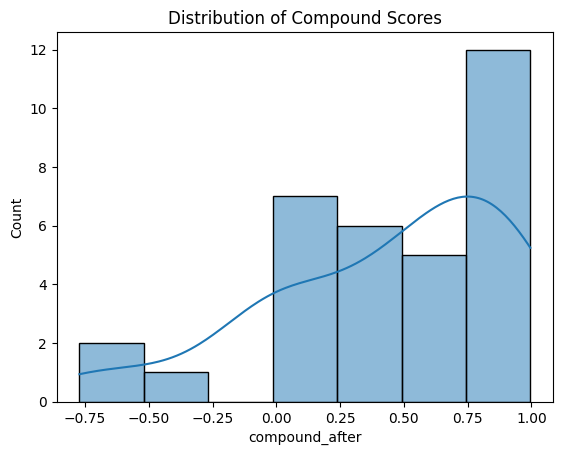

In [493]:
# Univariate Analysis: Distribution of polarity scores
sns.histplot(data_df['compound_after'], kde=True)
plt.title("Distribution of Compound Scores")
plt.show()

#### This histogram shows the distribution of compound sentiment scores, ranging from -0.75 to 1.0.  The distribution is bimodal, with peaks in the strongly positive (0.75-1.0) and near-neutral (0.0-0.25) ranges. This means the dataset contains many reviews with either strongly positive or neutral sentiment, with fewer falling in moderately positive or negative sentiment.

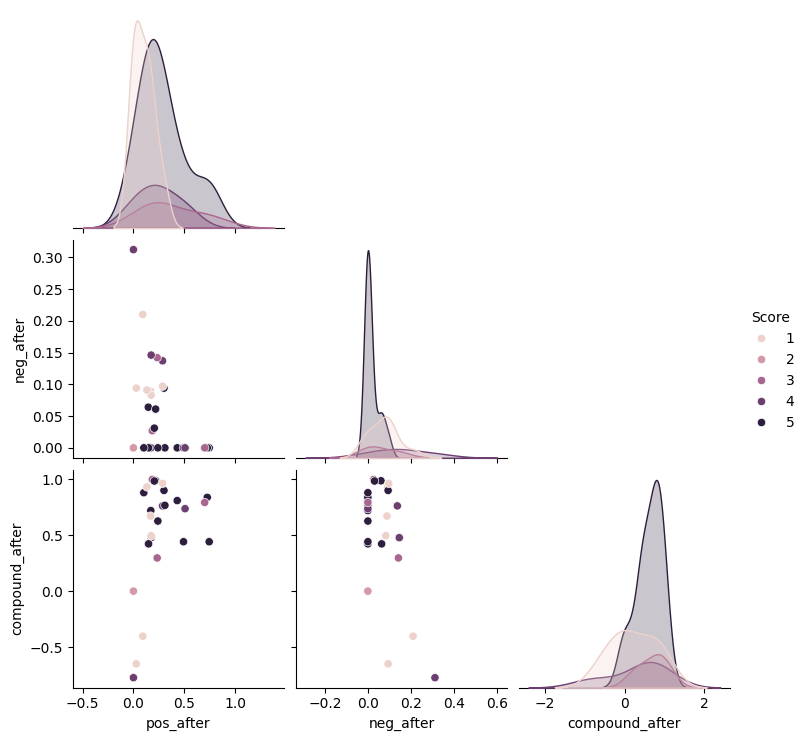

In [494]:
# Bivariate Analysis: Relationship between Review Score and Polarity Scores
sns.pairplot(data_df[['Score', 'pos_after', 'neg_after', 'compound_after']], hue='Score', corner=True)
plt.show()

In [495]:
# Correlation between Review Score and Polarity Scores
correlation = data_df[['Score', 'pos_after', 'neg_after', 'compound_after']].corr()
print("Correlation Matrix:\n", correlation)

Correlation Matrix:
                    Score  pos_after  neg_after  compound_after
Score           1.000000   0.388590  -0.229767        0.354709
pos_after       0.388590   1.000000  -0.226047        0.534384
neg_after      -0.229767  -0.226047   1.000000       -0.350429
compound_after  0.354709   0.534384  -0.350429        1.000000


#### Score vs. pos_after (0.388590): A moderate positive correlation (0.39) suggests that higher review scores tend to have a higher positive sentiment score.
#### Score vs. neg_after (-0.229767): A weak negative correlation (-0.23) suggests that lower review scores are somewhat associated with more negative sentiment.

#### Score vs. compound_after (0.354709): A moderate positive correlation (0.35) between review score and compound sentiment score suggests that the overall sentiment (combining positive, neutral, and negative words) aligns well with the actual rating.

#### pos_after vs. compound_after (0.534384): A strong positive correlation (0.53) suggests that reviews with higher positive sentiment scores also have higher overall sentiment polarity (compound).

#### neg_after vs. compound_after (-0.350429): A moderate negative correlation (-0.35) means that as negative sentiment increases, the overall sentiment score decreases. Reviews with more negative words tend to have a lower overall sentiment polarity.

# Pareto Analysis

In [496]:
data_df.loc[data_df['pos_after']>0]

,Reviews,Score,pos,neg,neu,compound,pos_after,neg_after,neu_after,compound_after
0,second time buy headset first time 2018 held 7...,5,0.192,0.025,0.783,0.9091,0.171,0.000,0.829,0.7184
1,bought headset ps5 realli like build qualiti s...,4,0.149,0.130,0.721,0.4395,0.286,0.137,0.577,0.7602
2,impress sound qualiti microphon headset hurt h...,3,0.094,0.097,0.810,0.2199,0.233,0.142,0.625,0.2960
3,bought boyfriend christma great review world w...,1,0.108,0.044,0.847,0.7787,0.168,0.089,0.743,0.6694
4,71 better,5,0.000,0.383,0.617,-0.4782,0.744,0.000,0.256,0.4404
5,float headband weird get use keep tri adjust h...,4,0.170,0.110,0.720,0.8378,0.174,0.146,0.680,0.4767
7,bluetooth earbud reliabl disconnect easi use m...,5,0.302,0.046,0.651,0.9041,0.309,0.000,0.691,0.7650
8,stop work 152 month later dungl would work sev...,1,0.071,0.222,0.708,-0.6344,0.092,0.210,0.698,-0.4019
9,second set corsair wire headset own find shape...,5,0.089,0.023,0.887,0.6245,0.146,0.064,0.789,0.4215
11,third wireless headset ive tri far best one de...,5,0.163,0.047,0.791,0.9899,0.218,0.061,0.720,0.9838


In [497]:
nltk.word_tokenize(example_review)

['right',
 'out',
 'of',
 'the',
 'box',
 'the',
 'wired',
 'headset',
 'disconnects',
 'with',
 'any',
 'small',
 'movement',
 'of',
 'the',
 'wire',
 'waste',
 'of',
 'time',
 'and',
 'money']

# Positive > 0

In [498]:
positive_reviews =  ' '.join(text for text in data_df.loc[data_df['pos_after']>0,'Reviews'])
positive_reviews

'second time buy headset first time 2018 held 7 year daili use decid replac earpad start peel cord wear tear made nervou otherwis still work fine honestli best headset ive ever purchas bought headset ps5 realli like build qualiti sound qualiti abl test microphon chat unfortun return shape earbud good ear becom uncomfort without detail kept without hesit best immers rich sound test far bad recommend someth good impress sound qualiti microphon headset hurt headhair even though big one might subject help know overal overr overpr bought boyfriend christma great review world would make headphon arent adjust bare fit head ear cup way high there abil move perman posit elast band microphon qualiti also suck compar previou headset meant upgrad there lot echo pick much background nois like request refund return someth better 71 better float headband weird get use keep tri adjust headset head can’t lol get headset fatigu pretti quickli headset reason idk it’ user error plug charg turn even before

# Positive > 0 and Score == 1

In [499]:
data_df.loc[(data_df['Score']==1) & (data_df['pos_after']>0)]

,Reviews,Score,pos,neg,neu,compound,pos_after,neg_after,neu_after,compound_after
3,bought boyfriend christma great review world w...,1,0.108,0.044,0.847,0.7787,0.168,0.089,0.743,0.6694
8,stop work 152 month later dungl would work sev...,1,0.071,0.222,0.708,-0.6344,0.092,0.210,0.698,-0.4019
14,4th corsair product problem except start first...,1,0.038,0.050,0.913,-0.3818,0.028,0.094,0.878,-0.6486
26,4 month got canada comput took realli good car...,1,0.107,0.046,0.847,0.5819,0.174,0.083,0.743,0.4939
30,edit origin gave 2 star review first month im ...,1,0.098,0.106,0.796,-0.6445,0.132,0.091,0.776,0.9295
32,favor never buy product bad hardwar program su...,1,0.134,0.132,0.734,-0.3593,0.287,0.097,0.616,0.9610


In [500]:
positive_tokens =  nltk.word_tokenize(positive_reviews)
positive_tokens

['second',
 'time',
 'buy',
 'headset',
 'first',
 'time',
 '2018',
 'held',
 '7',
 'year',
 'daili',
 'use',
 'decid',
 'replac',
 'earpad',
 'start',
 'peel',
 'cord',
 'wear',
 'tear',
 'made',
 'nervou',
 'otherwis',
 'still',
 'work',
 'fine',
 'honestli',
 'best',
 'headset',
 'ive',
 'ever',
 'purchas',
 'bought',
 'headset',
 'ps5',
 'realli',
 'like',
 'build',
 'qualiti',
 'sound',
 'qualiti',
 'abl',
 'test',
 'microphon',
 'chat',
 'unfortun',
 'return',
 'shape',
 'earbud',
 'good',
 'ear',
 'becom',
 'uncomfort',
 'without',
 'detail',
 'kept',
 'without',
 'hesit',
 'best',
 'immers',
 'rich',
 'sound',
 'test',
 'far',
 'bad',
 'recommend',
 'someth',
 'good',
 'impress',
 'sound',
 'qualiti',
 'microphon',
 'headset',
 'hurt',
 'headhair',
 'even',
 'though',
 'big',
 'one',
 'might',
 'subject',
 'help',
 'know',
 'overal',
 'overr',
 'overpr',
 'bought',
 'boyfriend',
 'christma',
 'great',
 'review',
 'world',
 'would',
 'make',
 'headphon',
 'arent',
 'adjust',
 'b

In [501]:
positive_tags =  nltk.pos_tag(positive_tokens)
positive_tags

[('second', 'JJ'),
 ('time', 'NN'),
 ('buy', 'VB'),
 ('headset', 'VBN'),
 ('first', 'JJ'),
 ('time', 'NN'),
 ('2018', 'CD'),
 ('held', 'VBD'),
 ('7', 'CD'),
 ('year', 'NN'),
 ('daili', 'NN'),
 ('use', 'NN'),
 ('decid', 'NN'),
 ('replac', 'NN'),
 ('earpad', 'JJ'),
 ('start', 'NN'),
 ('peel', 'NN'),
 ('cord', 'NN'),
 ('wear', 'NN'),
 ('tear', 'IN'),
 ('made', 'VBN'),
 ('nervou', 'NN'),
 ('otherwis', 'NN'),
 ('still', 'RB'),
 ('work', 'VB'),
 ('fine', 'JJ'),
 ('honestli', 'NN'),
 ('best', 'JJS'),
 ('headset', 'NN'),
 ('ive', 'JJ'),
 ('ever', 'RB'),
 ('purchas', 'VBP'),
 ('bought', 'VBN'),
 ('headset', 'NN'),
 ('ps5', 'NN'),
 ('realli', 'NN'),
 ('like', 'IN'),
 ('build', 'NN'),
 ('qualiti', 'VBP'),
 ('sound', 'JJ'),
 ('qualiti', 'JJ'),
 ('abl', 'JJ'),
 ('test', 'NN'),
 ('microphon', 'NN'),
 ('chat', 'WP'),
 ('unfortun', 'JJ'),
 ('return', 'NN'),
 ('shape', 'NN'),
 ('earbud', 'RB'),
 ('good', 'JJ'),
 ('ear', 'NN'),
 ('becom', 'NN'),
 ('uncomfort', 'NN'),
 ('without', 'IN'),
 ('detail', 'NN'

In [502]:
nouns_df =  pd.DataFrame(columns=['names'])

In [503]:
for item in positive_tags:
    if item[1] == 'NN':
        nouns_df.loc[len(nouns_df.index)]={'names' : item[0]}
nouns_df.head()

,names
0,time
1,time
2,year
3,daili
4,use


In [504]:
nouns_df.value_counts()

names  
headset    27
head       14
use        14
time       13
pad        12
           ..
anyon       1
anymor      1
alway       1
aesthet     1
addit       1
Name: count, Length: 398, dtype: int64

In [505]:
pareto_df =  nouns_df.value_counts().nlargest(20).rename_axis('characteristic').reset_index(name = 'count')
pareto_df

,characteristic,count
0,headset,27
1,head,14
2,use,14
3,time,13
4,pad,12
5,microphon,11
6,game,11
7,tri,10
8,sound,10
9,thing,10


In [506]:
pareto_df['cumpec']=pareto_df['count'].cumsum()/pareto_df['count'].sum()*100

pareto_df

,characteristic,count,cumpec
0,headset,27,13.043478
1,head,14,19.806763
2,use,14,26.570048
3,time,13,32.850242
4,pad,12,38.647343
5,microphon,11,43.961353
6,game,11,49.275362
7,tri,10,54.106280
8,sound,10,58.937198
9,thing,10,63.768116


In [507]:
from matplotlib.ticker import PercentFormatter

In [508]:
def pareto(pareto_df):
    fig,ax = plt.subplots()
    ax.bar(pareto_df['characteristic'],pareto_df['count'])
    plt.xticks(rotation=90)
    ax2 = ax.twinx()

    ax2.plot(pareto_df['characteristic'],pareto_df['cumpec'],color='red',marker = 'o')
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax2.axhline(80,color ='green')

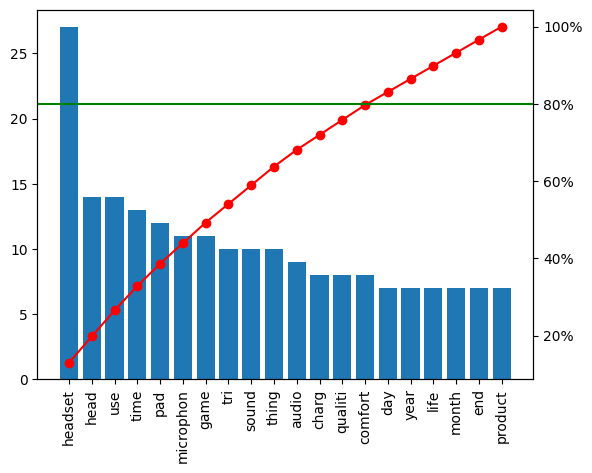

In [509]:
pareto(pareto_df)

# Method 2: Neutral > 0.6

In [511]:
neutral_reviews = " ".join(data_df.loc[data_df['neu_after'] > 0.6, 'Reviews'])

In [512]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

tokens = word_tokenize(neutral_reviews)
pos_tags = nltk.pos_tag(tokens)


nouns = [word for word, tag in pos_tags if tag in ['NN', 'NNS']]
freq_dist = FreqDist(nouns)


In [513]:
pareto_df_neu = pd.DataFrame(freq_dist.most_common(20), columns=['characteristic', 'count'])
pareto_df_neu['cumpec'] = pareto_df_neu['count'].cumsum() / pareto_df_neu['count'].sum() * 100

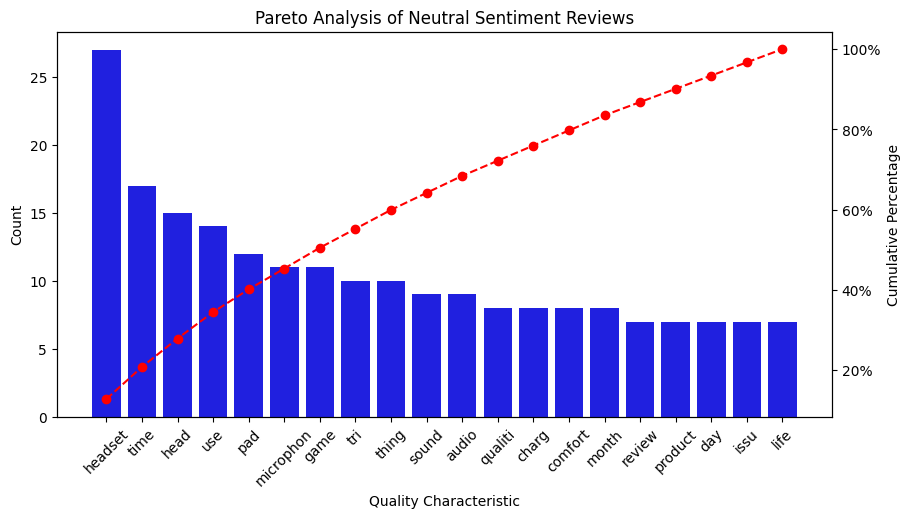

In [514]:
#Plot Pareto Chart
fig, ax1 = plt.subplots(figsize=(10,5))

sns.barplot(x='characteristic', y='count', data=pareto_df_neu, color='b', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_xlabel('Quality Characteristic')
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.plot(pareto_df_neu['characteristic'], pareto_df_neu['cumpec'], color='r', marker="o", linestyle='dashed')
ax2.set_ylabel('Cumulative Percentage')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))

plt.title("Pareto Analysis of Neutral Sentiment Reviews")
plt.show()

def pareto(pareto_df):
    fig,ax = plt.subplots()
    ax.bar(pareto_df['characteristic'],pareto_df['count'])
    plt.xticks(rotation=90)
    ax2 = ax.twinx()

    ax2.plot(pareto_df['characteristic'],pareto_df['cumpec'],color='red',marker = 'o')
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax2.axhline(80,color ='green')

##### Top Categories Overlap:  Both analyses show significant overlap in the top categories. "Headset," "time," "use," and "head" appear prominently in both the positive and neutral sentiment analyses. This suggests these aspects are frequently discussed regardless of the emotional tone.  They are likely core features or experiences that customers consistently mention.

In [515]:
# Compare Top 5 characteristics from both methods
top_neutral = pareto_df_neu.head(5)
top_positive = pareto_df.head(5)

# Merging results for comparison
merged_pareto = pd.merge(
    top_neutral, top_positive, on="characteristic", how="outer", suffixes=("_neutral", "_positive")
)

# Fill NaN values with 0 for counts
merged_pareto.fillna(0, inplace=True)

In [516]:
# Display comparison
print("\n# Quality Characteristics Needing Attention (Comparison of Both Methods)")
print(merged_pareto)


# Quality Characteristics Needing Attention (Comparison of Both Methods)
  characteristic  count_neutral  cumpec_neutral  count_positive  \
0           head             15       27.830189              14   
1        headset             27       12.735849              27   
2            pad             12       40.094340              12   
3           time             17       20.754717              13   
4            use             14       34.433962              14   

   cumpec_positive  
0        19.806763  
1        13.043478  
2        38.647343  
3        32.850242  
4        26.570048  


#### Quality Characteristics Needing Attention:

#### 1. Pad: 40.09% neutral feedback and only 12 positive reviews.
#### Action: Focus on improving comfort, durability, and design to boost satisfaction.

#### 2. Head: 27.83% neutral feedback and 14 positive reviews.
#### Action: Enhance design or features to improve customer satisfaction.

#### 3. Use: 34.44% neutral feedback and 14 positive reviews.
#### Action: Improve usability and user experience to convert neutral feedback to positive.

#### Priority for Improvement:
#### 1. Pad: Needs the most attention due to high neutral feedback.
#### 2. Head: Requires attention to improve customer satisfaction.
#### 3. Use: Enhancements can lead to more positive feedback.
